In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from textwrap import wrap
import cv2
import random

In [32]:
def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]

def showHistogram(image):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        #np.delete(histr, 0)
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.ylim([0,7000])
    plt.show()

/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


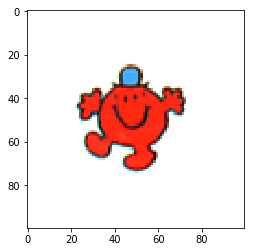

[[ 1.  1. -1. ..., -1.  1.  1.]
 [-1.  1. -1. ...,  1. -1. -1.]
 [ 1.  1. -1. ..., -1. -1. -1.]
 ..., 
 [ 1.  1. -1. ...,  1.  1. -1.]
 [-1.  1. -1. ...,  1.  1. -1.]
 [-1.  1. -1. ..., -1. -1.  1.]]
(100, 100, 3)


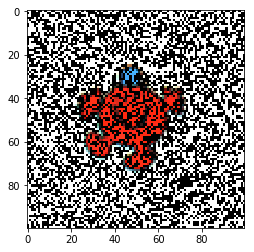

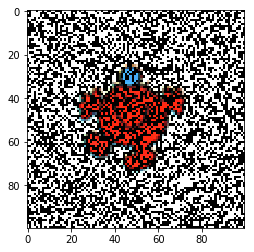

('Iteration: ', 0)


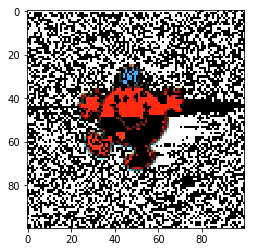

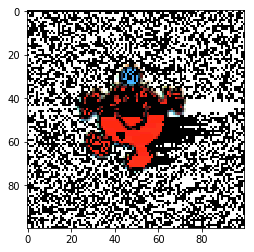

('Iteration: ', 1)


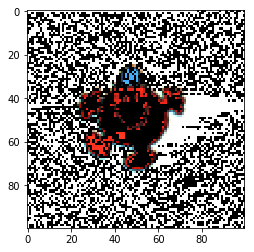

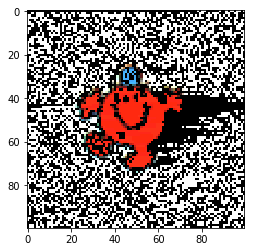

('Iteration: ', 2)


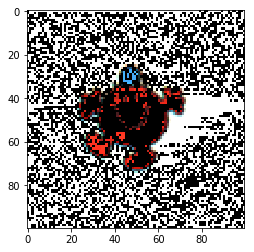

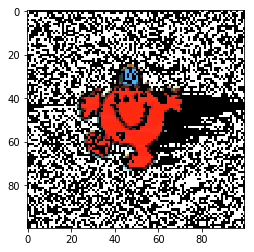

('Iteration: ', 3)


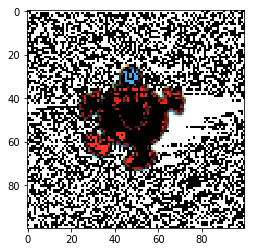

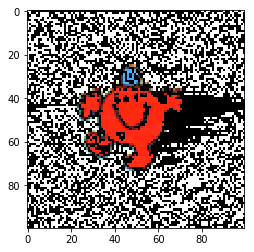

('Iteration: ', 4)


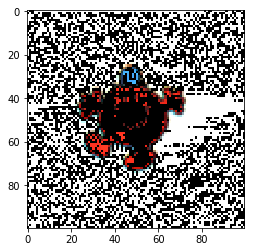

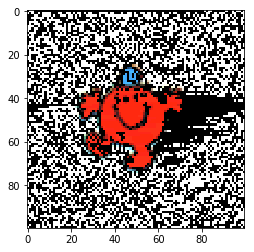

KeyboardInterrupt: 

In [33]:
prop = 0.3
varSigma = 0.1

im1 = cv2.imread("../images/manan.jpg")
im2 = cv2.imread("../images/mike.jpg")
im3 = imread("../images/mrworry.png")

#def GibbsSampling(image, wHigh, wLow, lim, random, display):
def GibbsSampling(image):
    H, W = heightWidth(image)
    plt.imshow(image, interpolation='nearest')
    plt.show()
    X = np.zeros((H,W))
    lim = 5
    
    # randomly assign -1 or 1 to the latent variable of each pixel 
    for i in range(H):
        for j in range(W):
            X[(i, j)] = np.random.choice([-1, 1])
    print(X)
    # -1 is background and +1 is foreground
    print (image.shape)
    # create foreground and background image (rest of the stuff in the image is black, FIX?)
    foreIm = np.copy(image) 
    backIm = np.copy(image)
    for i in range(H):
        for j in range(W):
            if (X[(i,j)] == -1):
                foreIm[(i,j)] = [0, 0, 0]
            else:
                backIm[(i,j)] = [0, 0, 0]
    
    plt.imshow(foreIm, interpolation='nearest')
    plt.show()
    plt.imshow(backIm, interpolation='nearest')
    plt.show()
    tempForeIm = foreIm.reshape(W*H, 3)
    foreHist, foreEdges = np.histogramdd(tempForeIm, normed=False, range = ([[0,255],[0,255],[0,255]]))

    
    # show histograms for foreground and background
#     showHistogram(foreIm)
#     showHistogram(backIm)
    
    lim = 40
    
    for iteration in range(lim):
        for i in range(H):
            for j in range(W):
                X[(i,j)] = newLikelihood(image, foreIm, backIm, (i,j))
#                 X[(i,j)] = likelihood(image, foreIm, backIm, (i,j))
                if X[(i,j)] == -1:
                    backIm[(i,j)] = image[(i,j)]
                    foreIm[(i,j)] = [0, 0, 0]
                else:
                    foreIm[(i,j)] = image[(i,j)]
                    backIm[(i,j)] = [0, 0, 0]
        print ("Iteration: ", iteration)
        plt.show()
        plt.imshow(foreIm, interpolation='nearest')
        plt.show()
        plt.imshow(backIm, interpolation='nearest')
        plt.show()
        
                    
#     showHistogram(foreIm)
#     showHistogram(backIm)
    print ("Complete")
    plt.imshow(foreIm, interpolation='nearest')
    plt.show()
    plt.imshow(backIm, interpolation='nearest')
    plt.show()
                
                
def newLikelihood(image, foreIm, backIm, pixel):
    H, W = heightWidth(image)
    tempForeIm = foreIm.reshape(W*H, 3)
    tempBackIm = backIm.reshape(W*H, 3)
    foreHist, foreEdges = np.histogramdd(tempForeIm, normed=False, range = ([[0,255],[0,255],[0,255]]))
    backHist, backEdges = np.histogramdd(tempBackIm, normed=False, range = ([[0,255],[0,255],[0,255]]))
    bBin, gBin, rBin = 0, 0, 0
    #print len(foreEdges[0])
    for i in range(1, len(foreEdges[0])):
        if image[pixel][0] <= 25.5*i and i > 25.5*(i-1):
            bBin = i
        if image[pixel][1] <= 25.5*i and i > 25.5*(i-1):
            gBin = i
        if image[pixel][2] <= 25.5*i and i > 25.5*(i-1):
            rBin = i
    if foreHist[bBin, gBin, rBin] > backHist[bBin, gBin, rBin]:
        return 1
    else:
        return -1
    
#def mask(X,)
            
def likelihood(image, foreIm, backIm, pixel):
    H, W = heightWidth(foreIm)
    color = ('b','g','r')
    # foreground and background stuff
    foreColour = [0, 0, 0]
    backColour = [0, 0, 0]
    for i,col in enumerate(color):
        foreHist = cv2.calcHist([foreIm],[i],None,[256],[0,256])
        backHist = cv2.calcHist([backIm],[i],None,[256],[0,256])
        newForeHist = np.delete(foreHist, 0)
        newBackHist = np.delete(backHist, 0)
        histLen = (len(newForeHist))
        foreColour[i] = np.average(range(0, histLen), weights=(newForeHist))
        backColour[i] = np.average(range(0, histLen), weights=(newBackHist))
    foreDiff, backDiff = 0, 0
    for i in range(3):
        foreDiff += np.abs(foreColour[i] - image[pixel][i])
        backDiff += np.abs(backColour[i] - image[pixel][i])
    if backDiff <= foreDiff:
        return -1
    else:
        return 1
        
    
GibbsSampling(im3)